In [1]:
#import tools
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import psycopg2
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
#import data from Kaggle
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine= create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
education= pd.read_sql_query('select * from useducation', con=engine)

engine.dispose()

In [3]:
education.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN


In [4]:
#Determine all the variable types 
education.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1492 entries, 0 to 1491
Data columns (total 25 columns):
PRIMARY_KEY                     1492 non-null object
STATE                           1492 non-null object
YEAR                            1492 non-null int64
ENROLL                          1229 non-null float64
TOTAL_REVENUE                   1280 non-null float64
FEDERAL_REVENUE                 1280 non-null float64
STATE_REVENUE                   1280 non-null float64
LOCAL_REVENUE                   1280 non-null float64
TOTAL_EXPENDITURE               1280 non-null float64
INSTRUCTION_EXPENDITURE         1280 non-null float64
SUPPORT_SERVICES_EXPENDITURE    1280 non-null float64
OTHER_EXPENDITURE               1229 non-null float64
CAPITAL_OUTLAY_EXPENDITURE      1280 non-null float64
GRADES_PK_G                     1319 non-null float64
GRADES_KG_G                     1360 non-null float64
GRADES_4_G                      1361 non-null float64
GRADES_8_G                      1

In [5]:
#Find the fraction of the missing values for each variable
education.isnull().sum()/education.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

_Notice that the data has a time dimension (year). For this assignment, forget about time and treat all the observations as if they're from the same year. Choose a strategy to deal with the missing values for each variables. For which variables would filling in the missing values with some value make sense? For which might tossing out the records entirely make sense?_

In [6]:
education2= education.copy()

fill_list= ['ENROLL', 'TOTAL_REVENUE', 'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE', 'TOTAL_EXPENDITURE',
           'INSTRUCTION_EXPENDITURE', 'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE', 'CAPITAL_OUTLAY_EXPENDITURE', 
            'GRADES_PK_G', 'GRADES_KG_G', 'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G', 'GRADES_9_12_G', 
            'GRADES_ALL_G']

for col in fill_list:
    education2.loc[:, col].fillna(education2.loc[:, col].mean(), inplace=True)
education2

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,915930.820993,2.678885e+06,3.041770e+05,1.659028e+06,7.156800e+05,2.653798e+06,1.481703e+06,...,57948.000000,58025.000000,41167.00000,4.715640e+05,1.963860e+05,6.761740e+05,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,915930.820993,1.049591e+06,1.067800e+05,7.207110e+05,2.221000e+05,9.724880e+05,4.983620e+05,...,9748.000000,8789.000000,6714.00000,7.911700e+04,3.084700e+04,1.123350e+05,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,915930.820993,3.258079e+06,2.978880e+05,1.369815e+06,1.590376e+06,3.401580e+06,1.435908e+06,...,55433.000000,49081.000000,37410.00000,4.371270e+05,1.752100e+05,6.148810e+05,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,915930.820993,1.711959e+06,1.785710e+05,9.587850e+05,5.746030e+05,1.743022e+06,9.643230e+05,...,34632.000000,36011.000000,27651.00000,2.813380e+05,1.231130e+05,4.052590e+05,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,915930.820993,2.626002e+07,2.072470e+06,1.654651e+07,7.641041e+06,2.713883e+07,1.435892e+07,...,418418.000000,363296.000000,270675.00000,3.286034e+06,1.372011e+06,4.717112e+06,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,915930.820993,3.185173e+06,1.632530e+05,1.307986e+06,1.713934e+06,3.264826e+06,1.642466e+06,...,50648.000000,45025.000000,34533.00000,3.949040e+05,1.602990e+05,5.626130e+05,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,915930.820993,3.834302e+06,1.435420e+05,1.342539e+06,2.348221e+06,3.721338e+06,2.148041e+06,...,38058.000000,33691.000000,28366.00000,3.042840e+05,1.269170e+05,4.369320e+05,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,915930.820993,6.452330e+05,4.594500e+04,4.209420e+05,1.783460e+05,6.387840e+05,3.727220e+05,...,8272.000000,8012.000000,6129.00000,6.749500e+04,2.833800e+04,9.629600e+04,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,915930.820993,7.094800e+05,6.474900e+04,0.000000e+00,6.447310e+05,7.428930e+05,3.291600e+05,...,5832.000000,5000.000000,3433.00000,4.700900e+04,1.817300e+04,7.000000e+04,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,915930.820993,1.150630e+07,7.884200e+05,5.683949e+06,5.033930e+06,1.130564e+07,5.166374e+06,...,164416.000000,142372.000000,100835.00000,1.276685e+06,5.115570e+05,1.819706e+06,213.689751,259.908848,204.882606,262.118986


In [7]:
education2.isnull().sum()/education2.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.000000
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.000000
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

_Now, take into account the time factor. Replicate your second answer but this time fill in the missing values by using a statistic that is calculated within the year of the observation. For example, if you want to fill a missing value for a variable with the mean of that variable, calculate the mean by using only the observations for that specific year._

In [8]:
education3 = education.copy()

years = education3["YEAR"].unique()

for col in fill_list:
    for year in years:
        education3.loc[education3.YEAR == year, col].fillna(
        education3[education3.YEAR == year][col].mean(), inplace=True)
education3

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,NaN,NaN,NaN,258.859712
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,NaN
5,1992_COLORADO,COLORADO,1992,NaN,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,50648.0,45025.0,34533.0,394904.0,160299.0,562613.0,221.023429,272.398433,213.480890,266.419687
6,1992_CONNECTICUT,CONNECTICUT,1992,NaN,3834302.0,143542.0,1342539.0,2348221.0,3721338.0,2148041.0,...,38058.0,33691.0,28366.0,304284.0,126917.0,436932.0,226.798480,273.739345,222.417599,264.713904
7,1992_DELAWARE,DELAWARE,1992,NaN,645233.0,45945.0,420942.0,178346.0,638784.0,372722.0,...,8272.0,8012.0,6129.0,67495.0,28338.0,96296.0,217.899972,262.868585,206.389052,261.577921
8,1992_DISTRICT_OF_COLUMBIA,DISTRICT_OF_COLUMBIA,1992,NaN,709480.0,64749.0,0.0,644731.0,742893.0,329160.0,...,5832.0,5000.0,3433.0,47009.0,18173.0,70000.0,192.600553,234.924621,178.557612,265.976765
9,1992_FLORIDA,FLORIDA,1992,NaN,11506299.0,788420.0,5683949.0,5033930.0,11305642.0,5166374.0,...,164416.0,142372.0,100835.0,1276685.0,511557.0,1819706.0,213.689751,259.908848,204.882606,262.118986


In [9]:
education3.isnull().sum()/education3.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                          17.627346
TOTAL_REVENUE                   14.209115
FEDERAL_REVENUE                 14.209115
STATE_REVENUE                   14.209115
LOCAL_REVENUE                   14.209115
TOTAL_EXPENDITURE               14.209115
INSTRUCTION_EXPENDITURE         14.209115
SUPPORT_SERVICES_EXPENDITURE    14.209115
OTHER_EXPENDITURE               17.627346
CAPITAL_OUTLAY_EXPENDITURE      14.209115
GRADES_PK_G                     11.595174
GRADES_KG_G                      8.847185
GRADES_4_G                       8.780161
GRADES_8_G                       8.780161
GRADES_12_G                      8.780161
GRADES_1_8_G                     8.780161
GRADES_9_12_G                    8.780161
GRADES_ALL_G                    11.595174
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

_This time, fill in the missing values using interpolation (extrapolation)._

In [16]:
education4= education.copy()

education4.sort_values(['STATE', 'YEAR'], inplace=True)

for col in fill_list:
    if [education4['YEAR'] == max(years)]:
        education4.loc[:, col].fillna(
        method='ffill', inplace=True)
    elif [education4['YEAR'] == min(years)]:
        education4.loc[:, col].fillna(
        method='bfill', inplace=True)
    else:
        education4.loc[:, col].interpolate(inplace=True)
education4

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,NaN
52,1993_ALABAMA,ALABAMA,1993,727716.0,2827391.0,331409.0,1729295.0,766687.0,2833433.0,1564558.0,...,57497.0,60004.0,39900.0,470775.0,198651.0,677690.0,NaN,NaN,NaN,NaN
104,1994_ALABAMA,ALABAMA,1994,730004.0,2970223.0,331823.0,1850894.0,787506.0,3103266.0,1697593.0,...,56773.0,59165.0,41730.0,468472.0,201285.0,678808.0,NaN,NaN,NaN,NaN
157,1995_ALABAMA,ALABAMA,1995,727480.0,3367437.0,328957.0,2161366.0,877114.0,3353363.0,1851700.0,...,56486.0,59914.0,40981.0,470246.0,206840.0,686410.0,NaN,NaN,NaN,NaN
209,1996_ALABAMA,ALABAMA,1996,735912.0,3365113.0,334858.0,2138717.0,891538.0,3572283.0,1987018.0,...,57098.0,58305.0,42510.0,469370.0,207980.0,686983.0,211.646974,256.594863,210.920767,260.276441
260,1997_ALABAMA,ALABAMA,1997,737386.0,3981788.0,376200.0,2498847.0,1106741.0,3963624.0,2095904.0,...,57431.0,58210.0,44272.0,472847.0,208148.0,690881.0,NaN,NaN,NaN,NaN
312,1998_ALABAMA,ALABAMA,1998,739321.0,4140537.0,374153.0,2589819.0,1176565.0,4245033.0,2218693.0,...,58610.0,57105.0,43957.0,473954.0,205630.0,689925.0,NaN,NaN,NaN,NaN
363,1999_ALABAMA,ALABAMA,1999,737639.0,4471546.0,393095.0,2752653.0,1325798.0,4622810.0,2399626.0,...,60012.0,56201.0,42576.0,472019.0,202045.0,684612.0,NaN,NaN,NaN,NaN
416,2000_ALABAMA,ALABAMA,2000,730184.0,4885917.0,425978.0,3003814.0,1456125.0,5003267.0,2551713.0,...,59749.0,56951.0,42512.0,472686.0,201358.0,684880.0,217.941053,262.158206,206.880030,258.777258
468,2001_ALABAMA,ALABAMA,2001,728532.0,4832946.0,466150.0,2879636.0,1487160.0,5086045.0,2656393.0,...,58929.0,56591.0,42909.0,469591.0,201610.0,683042.0,NaN,NaN,NaN,NaN


In [17]:
education4.isnull().sum()/education4.isnull().count()*100

PRIMARY_KEY                      0.000000
STATE                            0.000000
YEAR                             0.000000
ENROLL                           0.067024
TOTAL_REVENUE                    0.000000
FEDERAL_REVENUE                  0.000000
STATE_REVENUE                    0.000000
LOCAL_REVENUE                    0.000000
TOTAL_EXPENDITURE                0.000000
INSTRUCTION_EXPENDITURE          0.000000
SUPPORT_SERVICES_EXPENDITURE     0.000000
OTHER_EXPENDITURE                0.067024
CAPITAL_OUTLAY_EXPENDITURE       0.000000
GRADES_PK_G                      0.000000
GRADES_KG_G                      0.000000
GRADES_4_G                       0.000000
GRADES_8_G                       0.000000
GRADES_12_G                      0.000000
GRADES_1_8_G                     0.000000
GRADES_9_12_G                    0.000000
GRADES_ALL_G                     0.000000
AVG_MATH_4_SCORE                64.075067
AVG_MATH_8_SCORE                64.343164
AVG_READING_4_SCORE             64

In [12]:
for col in fill_list:
    print("Statistics for column: {}".format(col))
    print(pd.concat([education[col], education2[col],
                     education3[col], education4[col]], axis=1).describe())

Statistics for column: ENROLL
             ENROLL        ENROLL        ENROLL        ENROLL
count  1.229000e+03  1.492000e+03  1.229000e+03  1.491000e+03
mean   9.159308e+05  9.159308e+05  9.159308e+05  9.364488e+05
std    1.065280e+06  9.667725e+05  1.065280e+06  1.054006e+06
min    4.386600e+04  4.386600e+04  4.386600e+04  4.386600e+04
25%    2.583140e+05  3.150940e+05  2.583140e+05  2.447800e+05
50%    6.483130e+05  8.204140e+05  6.483130e+05  6.623020e+05
75%    1.014528e+06  9.211780e+05  1.014528e+06  1.230857e+06
max    6.307022e+06  6.307022e+06  6.307022e+06  6.307022e+06
Statistics for column: TOTAL_REVENUE
       TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE  TOTAL_REVENUE
count   1.280000e+03   1.492000e+03   1.280000e+03   1.492000e+03
mean    9.092082e+06   9.092082e+06   9.092082e+06   1.028401e+07
std     1.174519e+07   1.087818e+07   1.174519e+07   1.338662e+07
min     4.656500e+05   4.656500e+05   4.656500e+05   4.656500e+05
25%     2.186305e+06   2.546261e+06   2.18630

          GRADES_8_G     GRADES_8_G     GRADES_8_G    GRADES_8_G
count    1361.000000    1492.000000    1361.000000    1492.00000
mean    64271.057311   64271.057311   64271.057311   63671.22118
std     78910.545776   75364.301721   78910.545776   79143.12537
min       437.000000     437.000000     437.000000     437.00000
25%     13342.000000   15682.750000   13342.000000   12801.50000
50%     43339.000000   49571.000000   43339.000000   42993.50000
75%     76566.000000   72131.000000   76566.000000   76080.50000
max    500143.000000  500143.000000  500143.000000  500143.00000
Statistics for column: GRADES_12_G
        GRADES_12_G    GRADES_12_G   GRADES_12_G    GRADES_12_G
count    1361.00000    1492.000000    1361.00000    1492.000000
mean    54268.92432   54268.924320   54268.92432   54283.404826
std     67889.27623   64838.328605   67889.27623   68936.456890
min       311.00000     311.000000     311.00000     311.000000
25%     10919.00000   13437.000000   10919.00000   10718.000

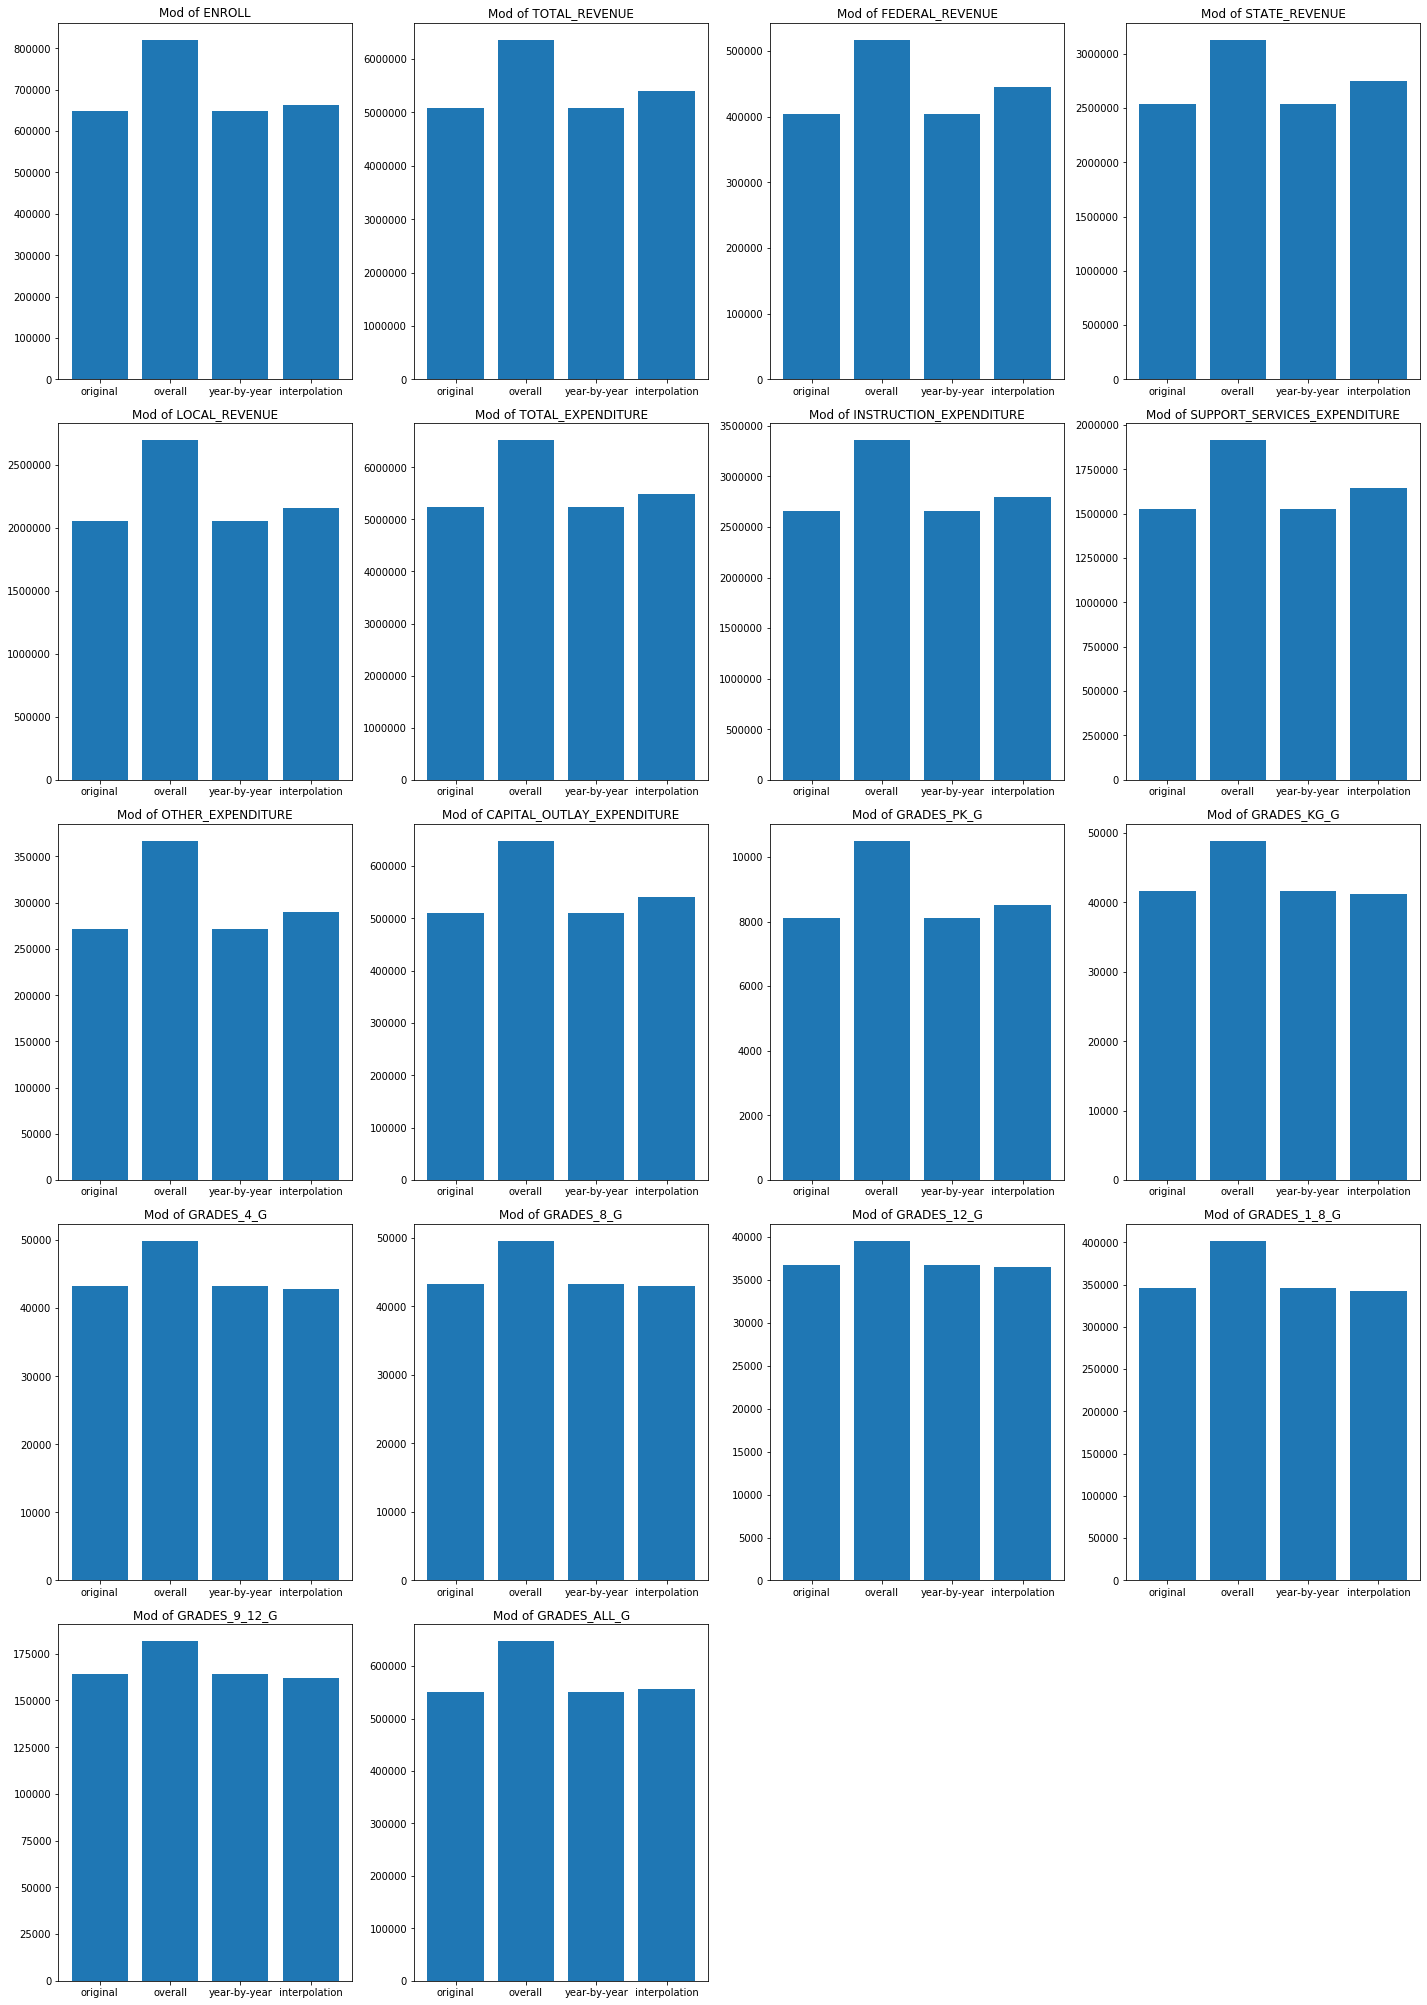

In [13]:
fig = plt.figure(figsize=(20,100))

for i, col in enumerate(fill_list):
    df = pd.concat([education[col], education2[col],
                     education3[col], education4[col]], axis=1)
    
    plt.subplot(len(fill_list), 4, i+1)
    plt.bar(["original", "overall", "year-by-year", "interpolation"], df.median())
    plt.title("Mod of {}".format(col))
    
plt.tight_layout()
plt.show()